In [47]:
import array
import os
import numpy as np
import random
from PIL import Image

class PPM2grey:
    def __init__(self):
        #self.real_image=None
        self.width=None
        self.height=None
        self.real_arr=None
        
        self.pgm_buff=None
        self.ppm_buff=None
        
        
        self.ppm_ready=True
        self.pgm_ready=True        
        
        
    def pgm_read(self,file):
            #Importing ppm image file using PIL module 
            real_image=Image.open(file)
            
            #Converting ppm image file into 3-D array using numpy module
            real_image_arr=np.asarray(real_image)
            self.real_arr=real_image_arr.copy()
            
            #getting the height and width of the ppm image
            shape = real_image_arr.shape
            print(shape)
            self.height = shape[0]
            self.width =  shape[1]

        
    def ppm_togrey(self):

        if self.width and self.height:
            
            #creating a copy of the 3-D array of the ppm image
            X_buffer = self.real_arr.copy()
            
            
            #creating a 1-D array for the pgm image
            Y_buffer = self.real_arr.copy()
            
            #Applying luminosity method on the copied array
            
            index=0
            for i in range(1,self.height-1):
                    upperLeft=0
                    left=0
                    lowerLeft=0
                    
                    upperRight=0
                    right=0
                    lowerRight=0
                    for j in range(1,self.width-1):
                        
                        #---------------------for X 3-D array---------------------------------
                        upperLeft= (self.real_arr[i-1][j-1] * -1)
                        left= (self.real_arr[i-1][j] * -2)
                        lowerLeft= (self.real_arr[i-1][j+1] * -1)
                        
                        upperRight= (self.real_arr[i+1][j-1] * 1)
                        right= (self.real_arr[i+1][j] * 2)
                        lowerRight= (self.real_arr[i+1][j+1] * 1)
                        
                        val= (upperLeft + left + lowerLeft + upperRight + right + lowerRight)

                        X_buffer[i][j]= val
                        
                        
                        #---------------------for pgm 1-D array-----------------------------------
                        
                    
                    index+=self.width
                        
          
            '''for i in range(1,self.width-1):
                    for j in range(1,self.height-1):
                        
                        #---------------------for X 3-D array---------------------------------
                        Y_buffer[i][j]= (X_buffer[i-1][j] * -1) + (X_buffer[i][j] * 0) + (X_buffer[i][j+1] * 1)
                        
                        
                        
                        #---------------------for pgm 1-D array-----------------------------------
                        
                    
                    index+=self.width'''
            self.pgm_buff=X_buffer
            
            self.ppm_ready=True
            self.pgm_ready=True

    def pgm_toYaxis(self):

        if self.width and self.height:
            
            #creating a copy of the 3-D array of the ppm image
            X_buffer = self.real_arr.copy()
            
            
            #creating a 1-D array for the pgm image
            Y_buffer = self.real_arr.copy()
            
            #Applying luminosity method on the copied array
            
            index=0
            for i in range(1,self.height-1):
                    Left=0
                    up=0
                    Right=0
                    
                    for j in range(1,self.width-1):
                        
                        #---------------------for X 3-D array---------------------------------
                        Left= (self.real_arr[i][j-1] * 1)
                        current= (self.real_arr[i][j] * 2)
                        Right= (self.real_arr[i][j+1] * 1)
                        
                        val= (Left + current + Right)
                        
                        X_buffer[i][j]= val
                        
                        
                        
                        #---------------------for pgm 1-D array-----------------------------------
                        
                    
                    index+=self.width
                    
                        
          
            for i in range(1,self.height-1):
                    up= 0
                    current= 0
                    down= 0
                    for j in range(1,self.width-1):
                        
                        #---------------------for X 3-D array---------------------------------
                        up= (X_buffer[i-1][j] * -1)
                        current= (X_buffer[i][j] * 0)
                        down= (X_buffer[i+1][j] * 1)
                        
                        val = up + current + down
                        if val<0:
                            val=0

                        Y_buffer[i][j]= val
                        
                        
                        
                        #---------------------for pgm 1-D array-----------------------------------
                        
            
            self.pgm_buff=Y_buffer
            
            self.ppm_ready=True
            self.pgm_ready=True

    def pgm_toXaxis(self):

        if self.width and self.height:
            
            #creating a copy of the 3-D array of the ppm image
            X_buffer = self.real_arr.copy()
            
            
            #creating a 1-D array for the pgm image
            Y_buffer = self.real_arr.copy()
            
            #Applying luminosity method on the copied array
            
            index=0
            for i in range(1,self.height-1):
                    Left=0
                    up=0
                    Right=0
                    
                    for j in range(1,self.width-1):
                        
                        #---------------------for X 3-D array---------------------------------
                        Left= (self.real_arr[i][j-1] * -1)
                        current= (self.real_arr[i][j] * 0)
                        Right= (self.real_arr[i][j+1] * 1)
                        
                        val= (Left + current + Right)
                        
                        X_buffer[i][j]=val
                        
                        
                        #---------------------for pgm 1-D array-----------------------------------
                        
                    
                    index+=self.width
                        
          
            for i in range(1,self.height-1):
                    up= 0
                    current= 0
                    down= 0
                    for j in range(1,self.width-1):
                        
                        #---------------------for X 3-D array---------------------------------
                        up= (self.real_arr[i-1][j] *  1)
                        current= (self.real_arr[i][j] *  2)
                        down= (self.real_arr[i+1][j] *  1)
                        
                        val = up + current + down

                        Y_buffer[i][j]= val
                        
                        
                        
                        #---------------------for pgm 1-D array-----------------------------------
                        
                    
                    index+=self.width
            self.pgm_buff=Y_buffer
            
            self.ppm_ready=True
            self.pgm_ready=True

            
    def pgm_write(self):
        if self.pgm_ready:
            
            
            #creating an output file for pgm greyscale image
            pgm_grey = 'Grey_luminosity.pgm'
            
            
            #opening the output file
            fout_pgm=open(pgm_grey,'wb')

            
            # define PGM Header with magic number P5
            pgmHeader = 'P5' + '\n' + str(self.width) + '  ' + str(self.height) + '  ' + str(255) + '\n'
            #encode() for converting pgmheader from 'string' type to 'byte', and writing it in the output file
            fout_pgm.write(pgmHeader.encode())
            
            self.pgm_buff.tofile(fout_pgm)
            
            fout_pgm.close()
    

    def ppm_write(self):
        if self.ppm_ready:
            #creating an output file for ppm greyscale image
            
            ppm_grey = 'Grey_luminosity.ppm'
            
            #opening the output file
            fout_ppm=open(ppm_grey,'wb')
            
            
            # define PPM Header with magic number P6 
            ppmHeader = 'P6' + '\n' + str(self.width) + '  ' + str(self.height) + '  ' + str(255) + '\n'
            #encode() for converting ppmheader from 'string' type to 'byte', and writing it in the output file
            fout_ppm.write(ppmHeader.encode())
            
            self.ppm_buff.tofile(fout_ppm)
            
            fout_ppm.close()  
            Image.open(ppm_grey)



    def pgm_free(self):
        if self.pgm_ready:
            os.remove('Grey_luminosity.pgm')
            self.pgm_ready=False
            self.pgm_buff=None
        
        else:
            print('files does not exist!')
            

    def ppm_free(self):
        if self.ppm_ready:
            os.remove('Grey_luminosity.ppm')
            self.ppm_ready=False
            self.ppm_buff=None
        
        else:
            print('file does not exist!')
            
            
if __name__=='__main__':
    file='baboon.pgm'
    new_obj=PPM2grey()
    new_obj.pgm_read(file)

    new_obj.pgm_toYaxis()

    new_obj.pgm_write()

        

(480, 500)


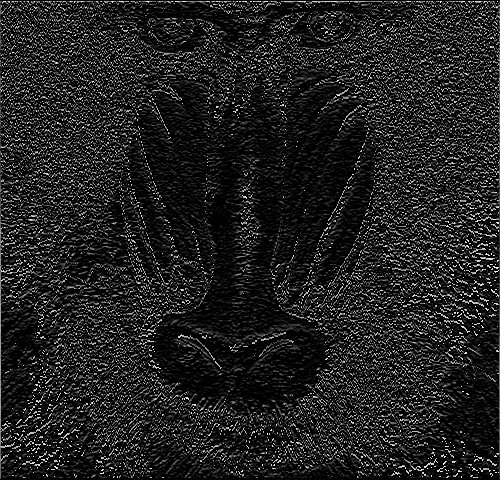

In [48]:
Image.open('Grey_luminosity.pgm')

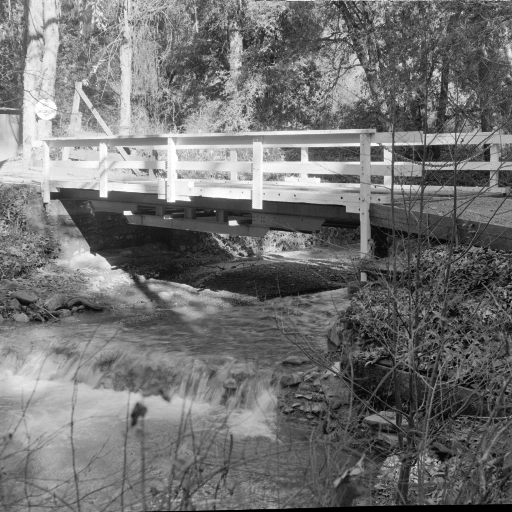

In [37]:
Image.open('bridge.pgm')